#                                     PANT DISEASE DETECTION





In [4]:
#We import all the necessary libraries required to process the data and build the model.
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [5]:
#we define all the hyperparameters
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\91938\\OneDrive\\Desktop\\plant_disease\\Plant_Village",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 19641 files belonging to 14 classes.


In [53]:
class_names = dataset.class_names
class_names

['Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\91938\\OneDrive\\Desktop\\pld",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5267 files belonging to 5 classes.


In [54]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[ 2  8  8  0 11 13 10 13  1  5  8  0 13 10  8 10  7  0  8 12  0 10  8 10
  1  7  0  8  5  0  0  4]


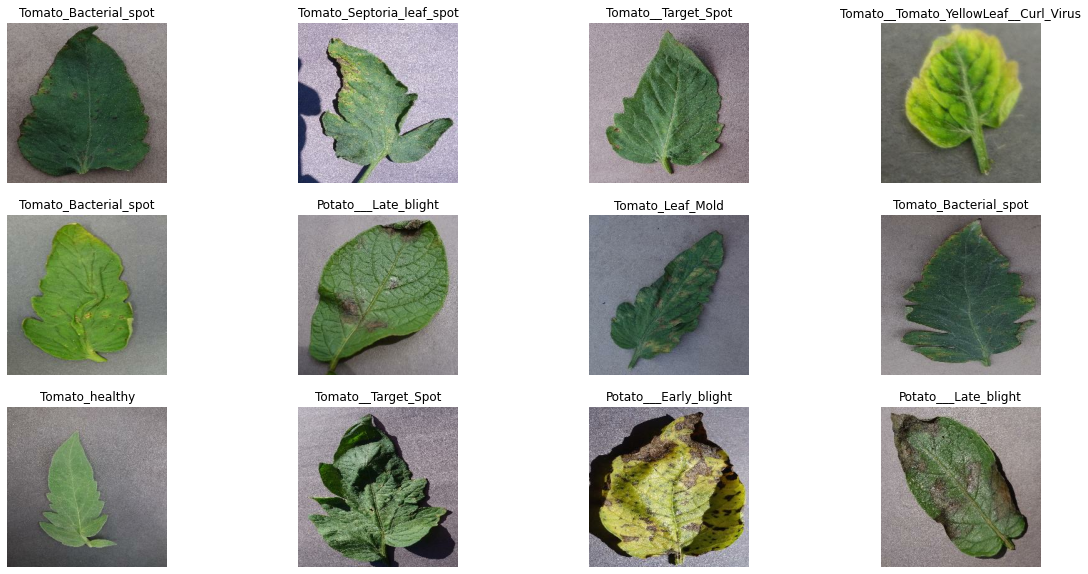

In [55]:
plt.figure(figsize=(20, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [56]:
def Img_preprocessing(n): 
 
    gray_scale=cv2.cvtColor(n, cv2.COLOR_BGR2GRAY ) 
 
    img_size=800
    resized_img=cv2.resize(gray_scale,(img_size,img_size)) 

    equ = cv2.equalizeHist(resized_img)
  
    blur=cv2.medianBlur(equ,5)
   
    grad_x = cv2.Sobel(blur, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(blur, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)   #sobel derivative
    clean_data =edges
    return clean_data

In [58]:
import os
import cv2
dir1="C:\\Users\\91938\\OneDrive\\Desktop\\pd"
catg=['Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']
img_cube=[]
image_size=800

for i in catg: #this will take the folder names as we call it as categoris
    path=os.path.join(dir1,i)
    label=catg.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j)) #convert rgb image to gray scale image
        final_data=Img_preprocessing(img_arr)
        img_cube.append((final_data,label))
print("Length of your dataset: ",len(img_cube))
print("Whole image data in array format:\n",img_cube)

Length of your dataset:  1365
Whole image data in array format:
 [(array([[ 0,  9,  6, ...,  2,  1,  0],
       [ 9, 15, 15, ...,  3,  3,  1],
       [15, 18, 21, ...,  1,  3,  2],
       ...,
       [ 9, 21, 26, ..., 25, 28, 26],
       [ 7, 16, 23, ..., 17, 25, 18],
       [ 0,  7, 13, ...,  8, 12,  0]], dtype=uint8), 0), (array([[ 0, 17, 45, ..., 42, 33,  0],
       [ 4, 21, 62, ..., 60, 71, 35],
       [ 8, 12, 28, ..., 26, 60, 47],
       ...,
       [ 6,  6,  6, ...,  9,  2,  0],
       [ 0,  0,  3, ...,  2,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0]], dtype=uint8), 0), (array([[ 0, 14, 32, ...,  0,  0,  0],
       [ 0, 14, 32, ...,  3,  6,  6],
       [ 0, 14, 32, ...,  6,  9,  6],
       ...,
       [ 5,  9,  9, ..., 33, 34, 10],
       [ 3,  8, 10, ..., 35, 26,  0],
       [ 0,  3,  6, ..., 34, 26,  0]], dtype=uint8), 0), (array([[ 0,  2,  1, ..., 35, 21,  0],
       [ 2,  3,  1, ..., 36, 31, 15],
       [ 1,  1,  2, ..., 29, 25, 15],
       ...,
       [ 0,  0,  0, ..., 35

0

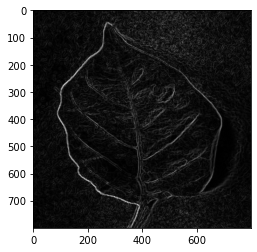

In [50]:
plt.imshow(img_cube[3][0],cmap='gray')
img_cube[3][1]

0

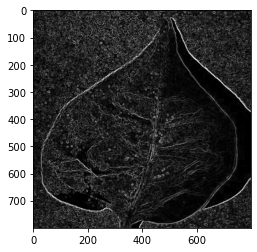

In [51]:
plt.imshow(img_cube[45][0],cmap='gray')
img_cube[45][1]

0

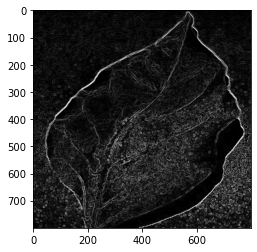

In [52]:
plt.imshow(img_cube[50][0],cmap='gray')
img_cube[50][1]

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [22]:

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


In [23]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 14

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [26]:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
76/76 [==============================] - 97s 1s/step - loss: 1.1264 - accuracy: 0.4267 - val_loss: 0.7009 - val_accuracy: 0.7326
Epoch 2/50
76/76 [==============================] - 96s 1s/step - loss: 0.5374 - accuracy: 0.7989 - val_loss: 0.3521 - val_accuracy: 0.8646
Epoch 3/50
76/76 [==============================] - 87s 1s/step - loss: 0.3940 - accuracy: 0.8571 - val_loss: 0.3315 - val_accuracy: 0.8611
Epoch 4/50
76/76 [==============================] - 83s 1s/step - loss: 0.2861 - accuracy: 0.8999 - val_loss: 0.2310 - val_accuracy: 0.9306
Epoch 5/50
76/76 [==============================] - 83s 1s/step - loss: 0.2168 - accuracy: 0.9281 - val_loss: 0.1487 - val_accuracy: 0.9340
Epoch 6/50
76/76 [==============================] - 86s 1s/step - loss: 0.2090 - accuracy: 0.9294 - val_loss: 0.2286 - val_accuracy: 0.9097
Epoch 7/50
76/76 [==============================] - 86s 1s/step - loss: 0.1642 - accuracy: 0.9418 - val_loss: 0.1546 - val_accuracy: 0.9375
Epoch 8/50
76/76 [==

In [28]:

scores = model.evaluate(test_ds)

10/10 [==============================] - 2s 234ms/step - loss: 0.0431 - accuracy: 0.9875


In [30]:
scores

[0.04309806227684021, 0.987500011920929]

In [31]:

history.params

{'verbose': 1, 'epochs': 50, 'steps': 76}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
type(history.history['loss'])

list

In [34]:
len(history.history['loss'])


50

In [35]:

history.history['loss'][:5] # show loss for first 5 epochs


[1.1263885498046875,
 0.5374382138252258,
 0.3940260410308838,
 0.28608644008636475,
 0.21681025624275208]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

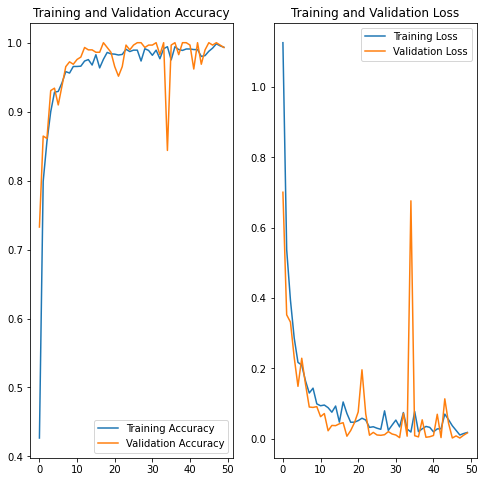

In [37]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


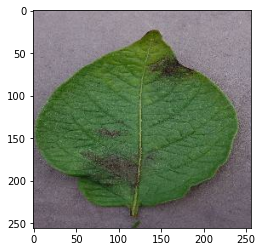

In [38]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    accuracy = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, accuracy

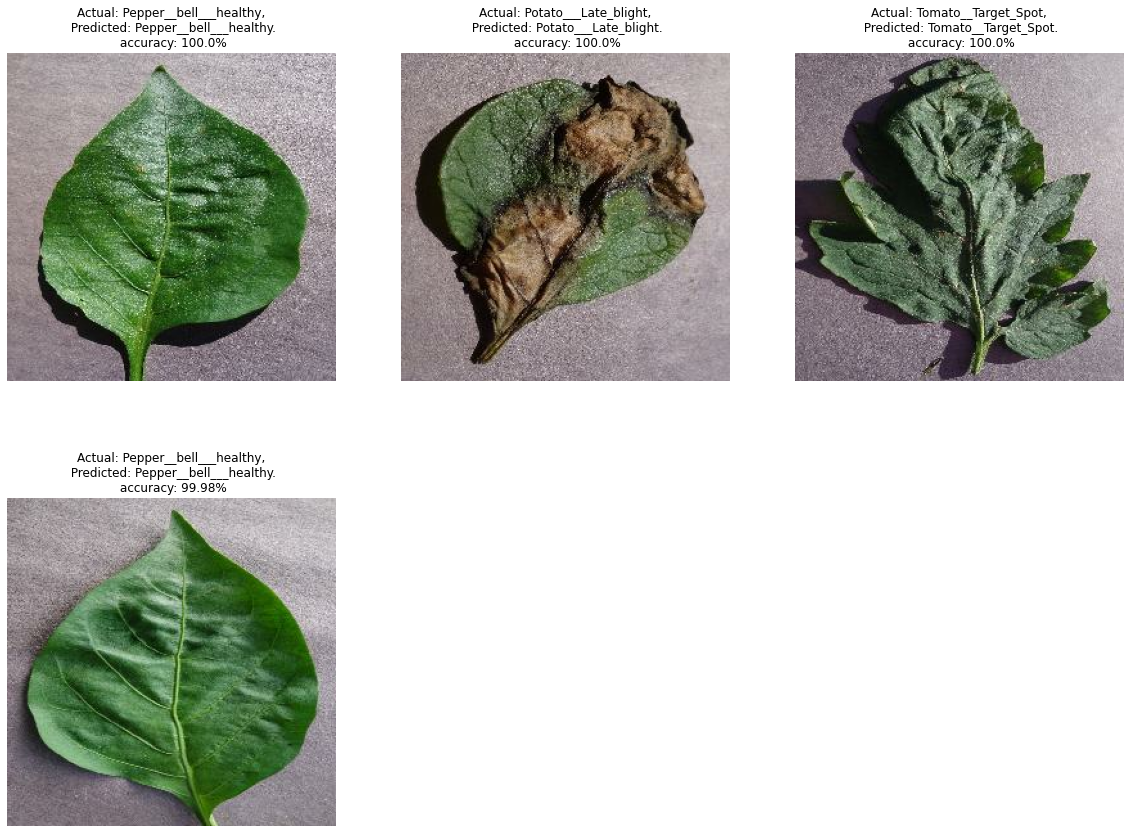

In [41]:
plt.figure(figsize=(20, 15))
for images, labels in test_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, accuracy = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n accuracy: {accuracy}%")
        
        plt.axis("off")
